# Location Set Covering Problem (LSCP)
The location set coverage problem is a problem proposed by Toregas et al. (1971). He pointed out that emergency services must be arranged based on response time, as there is a maximum allowable service time when discussing how to handle emergency activities. Therefore, he proposed a model called LSCP.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#LSCP" data-toc-modified-id="LSCP-1.1">LSCP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### LSCP
**Minimize the number of facilities required and determine their location so that each demand area is covered within a predefined maximum service distance or time.**

*Parameters*:
* ***P*** : the set of customers (or demand points);  
* ***J*** : the set of facilities;  
* **${d_{jp}}$** : the shortest distance from node $j$ to the facilities;  
* **S** : the maximal cover radius


###  Integer programming model:
$$
\begin{array}{lll}
\text{Min} &\sum_{j=1}^{n}x_j & (1) \\
\text{s.t.}&\sum\limits_{j\in {N_p}}{{x_j}\ge 1}\quad \forall p\in M, & (2)\\
& x_j\in \{0,1\},\ j=1,...,n. & (3)\\
\end{array}
$$

        

## Setup

In [1]:
import random
from itertools import product
import numpy as np
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from location.CModel import *

## Example

### Random Data

In [2]:
np.random.seed(0) # random seed

solver_list = listSolvers(onlyAvailable=True)
print(solver_list)

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


In [3]:
n_points = 20
radius = 0.2
num_people = np.random.randint(1, 10, size=n_points)
points = [(random.random(), random.random()) for i in range(n_points)]
facilities = points
points_np = np.array(points)
facilities_np = np.array(facilities)
A = np.sum((facilities_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis = -1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0

In [4]:
selected, obj = LocationSetCoveringModel(demand=num_people,
                                         num_points=n_points,
                                         num_facilities=n_points,
                                         cover=A,
                                         solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [0, 1, 5, 6, 10, 11, 12, 18, 19]
Minimum cost = 9.0


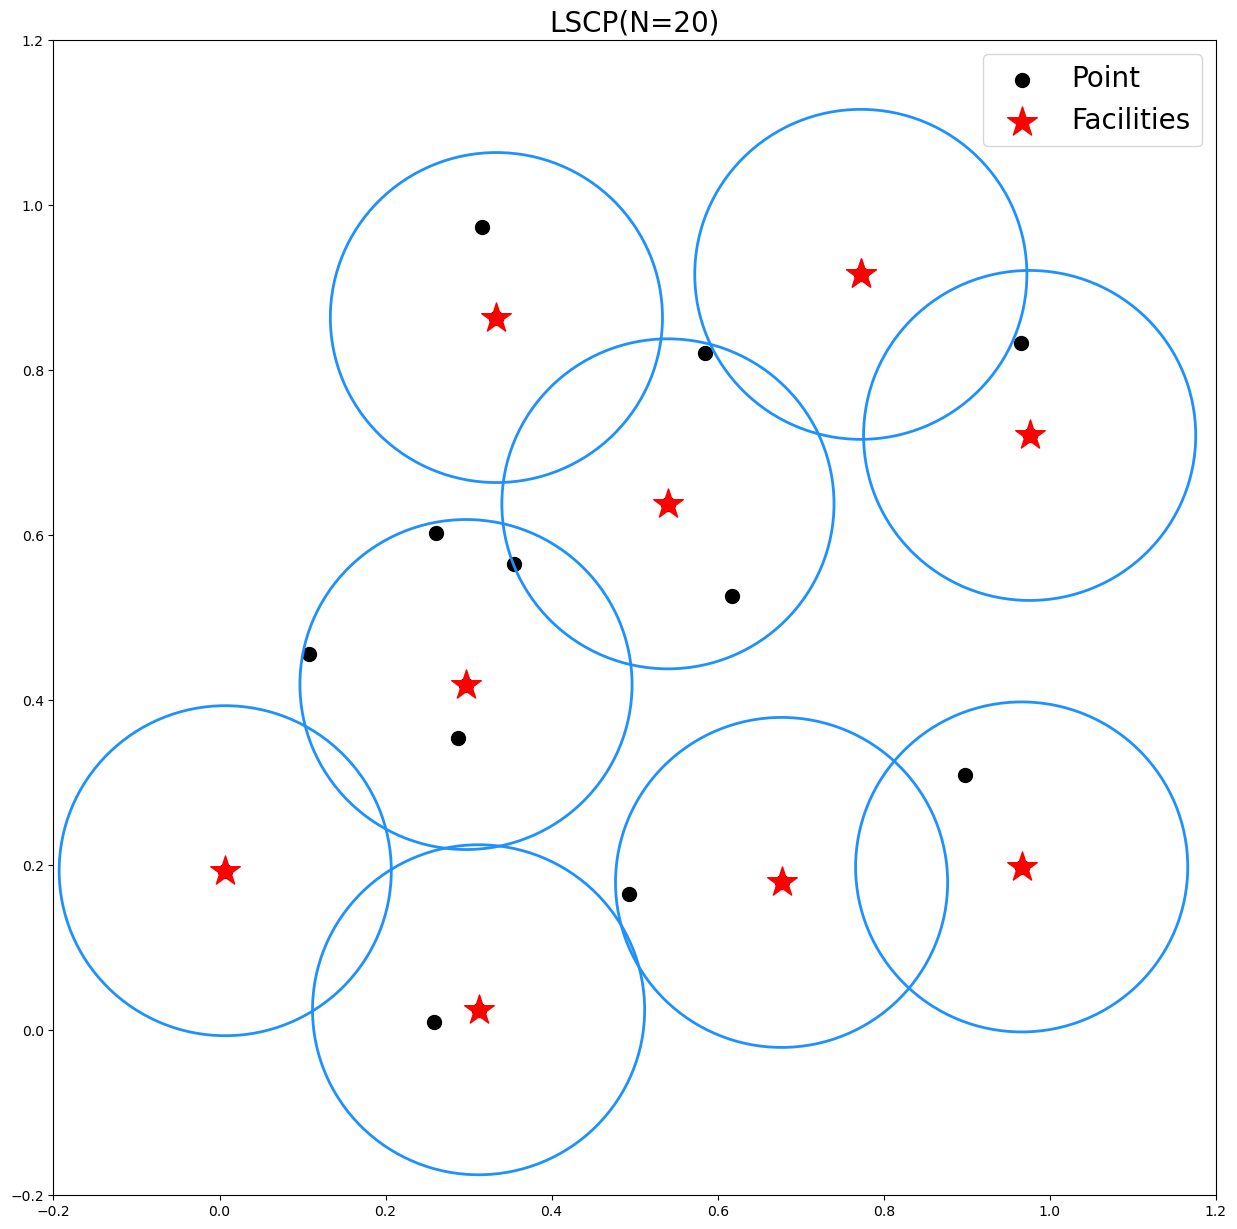

In [5]:
#Image representation
from matplotlib.patches import Circle
plt.figure(figsize=(15,15))
name = 'LSCP(N=' + str(n_points) + ')'
plt.title(name, fontsize = 20)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

plt.scatter(points_np[:, 0], points_np[:, 1], c='black', s=100, label="Point")
for i in selected:
    plt.scatter(points_np[i][0], points_np[i][1], c='red', marker='*', s=500)
    circle = Circle(xy=(points_np[i][0], points_np[i][1]), radius=radius, color='#1E90FF', fill=False, lw=2)
    ax.add_artist(circle)
plt.scatter(points_np[i][0], points_np[i][1], c='red', marker='*', s=500, label="Facilities")
# plt.grid(True)
plt.legend(loc='best', fontsize = 20)
plt.show()

### Road Network Data

In [6]:
df = pd.read_csv('E:\桌面\wheel\data\北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
# num_located = 10
prob = 0.2
np.random.seed(0)
num_people = np.random.randint(1,10, size=num_points)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [7]:
radius = 0.03
points_np = np.array(points)
A = np.sum((points_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis = -1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0

In [8]:
selected, obj = LocationSetCoveringModel(demand=num_people,
                                         num_points=num_points,
                                         num_facilities=num_points,
                                         cover=A,
                                         solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [31, 32, 39, 45, 59, 60, 61, 69, 71, 80, 84, 87, 88, 89, 91, 106, 113, 114]
Minimum cost = 18.0


(116.1558524, 116.6261645, 39.7248452, 40.0860762)

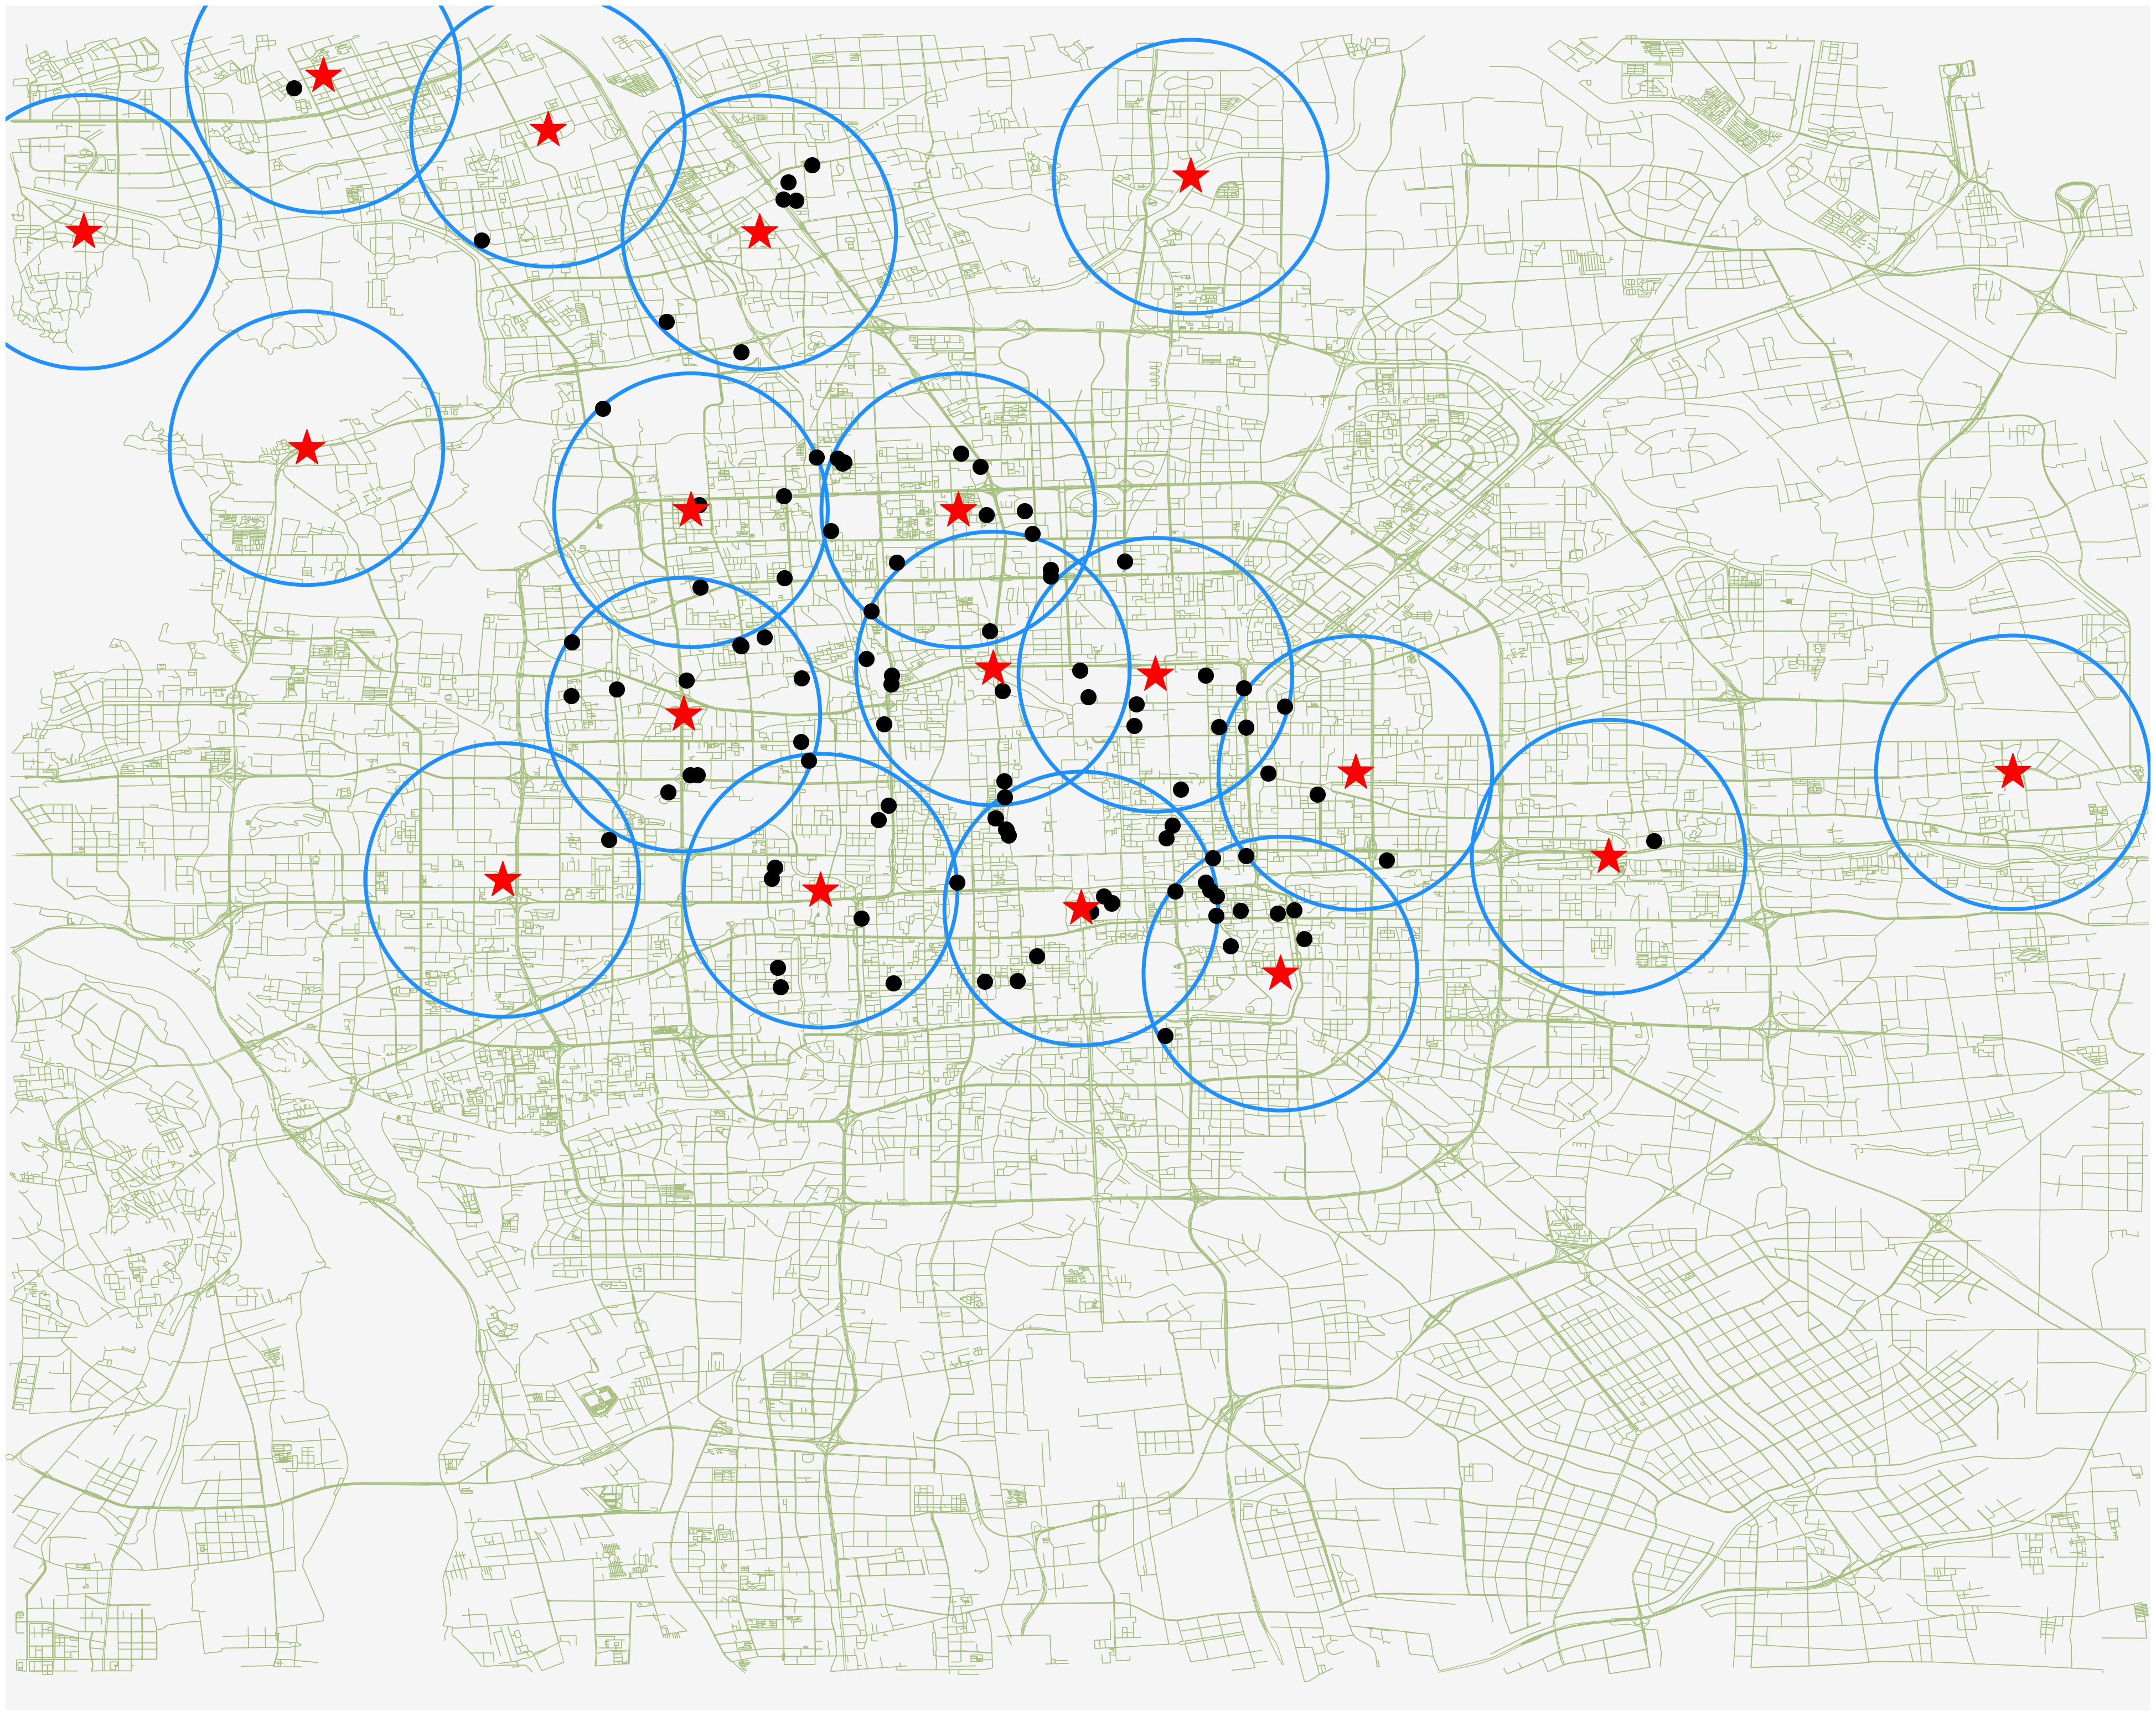

In [9]:
G = ox.load_graphml('..\data\Beijing.graphml')
ox.plot_graph(G, figsize=(50,40),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
ax = plt.gca()
for i in selected:
    circle = Circle(xy=(points_np[i][0], points_np[i][1]), radius=radius, color='#1E90FF', fill=False, lw=5)
    ax.add_artist(circle)
plt.axis('equal')